In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

def Graficos_TS8(fc, fs, xlim1=0, xlim2=10, ylim1=-60, ylim2=4):
    WN = int(5*10e3) # Cantidad de puntos para la funcion Freqz (por el procesamiento digital)
    KHz = 1000
    
    #defino nyquist y la frecuencia de sampling (fs argumento de la funcion)
    nq = fs/2
    ws = 2*np.pi*fs
    #defino norma de frecuencia y normalizo
    wo = 2*np.pi*fc
    fs_n = fs/wo
    ws_n = ws/wo
    #asumo sin prewarping
    K = 2*fs_n
    #Del butter orden 2
    Q = np.sqrt(2)/2
    
    # Coeficientes desnormalizados del numerador y denominador
    #Está calculado en la hoja pero de esta manera va a ser mas precisa
    A0 = K**2 + K/Q + 1
    A1 = 2 - 2*K**2
    A2 = K**2 - K/Q + 1
    B0 = 1
    B1 = 2
    B2 = 1
    #Coeficientes normalizados
    a0 = A0/A0
    a1 = A1/A0
    a2 = A2/A0
    b0 = B0/A0
    b1 = B1/A0
    b2 = B2/A0
    #Creo la funcion transferencia con los coeficientes
    numz = [b0, b1, b2]
    denz = [a0, a1, a2]
    w, h = sig.freqz(numz,denz,WN)
    
    ##Ahora me encargo de definir el pasa bajos analogico y pasarlo con la transformada bilineal
    num_lp = [0,  0,  1]
    den_lp = [1, 1/Q, 1]
    #Digital hecho por phyton
    numz_py, denz_py = sig.bilinear(num_lp, den_lp, fs_n) 
    w_py, h_py = sig.freqz(numz_py,denz_py,WN)
    #De manera analogica por phyton
    w_analog, h_analog = sig.freqs(num_lp,den_lp,  worN=np.logspace(-3, 2, 1000))
    #Lo expreso en db
    h_analog_db    = 20*np.log10(np.maximum(np.abs(h_analog), 1e-4))
    h_db    = 20*np.log10(np.maximum(np.abs(h), 1e-4))
    h_db_py = 20*np.log10(np.maximum(np.abs(h_py), 1e-4))
    
    
    #Funciones para graficar
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
    fig.set_size_inches(16,12)
    # MODULO
    fig.suptitle('ButterWorth N=2')
    #muestro las 3 distintas formas que lo calculé 
    ax.plot(w*nq/(np.pi*KHz), h_db,linewidth=3, label = 'Calculado') #Digital que calculé yo
    ax.plot(w_py*nq/(np.pi*KHz), h_db_py,color='purple',linestyle='dashed',linewidth=3, label = 'Python') #verificacion de digit
    ax.plot(w_analog*fc/KHz, h_analog_db, color = 'orange',linestyle=':',  linewidth=3, label = 'Analogico')#Analogico phyton
    ax.grid(True)
    ax.set_title('Respuesta Magnitud $f_c = {} KHz$ | $f_s = {}KHz$'.format(fc/KHz, fs/KHz))
    ax.set_ylabel('Magnitud [dB]')
    ax.set_xlabel('Frecuencia [KHz]')
    ax.legend()
    ax.set_xlim([xlim1, xlim2])
    ax.set_ylim([ylim1, ylim2])

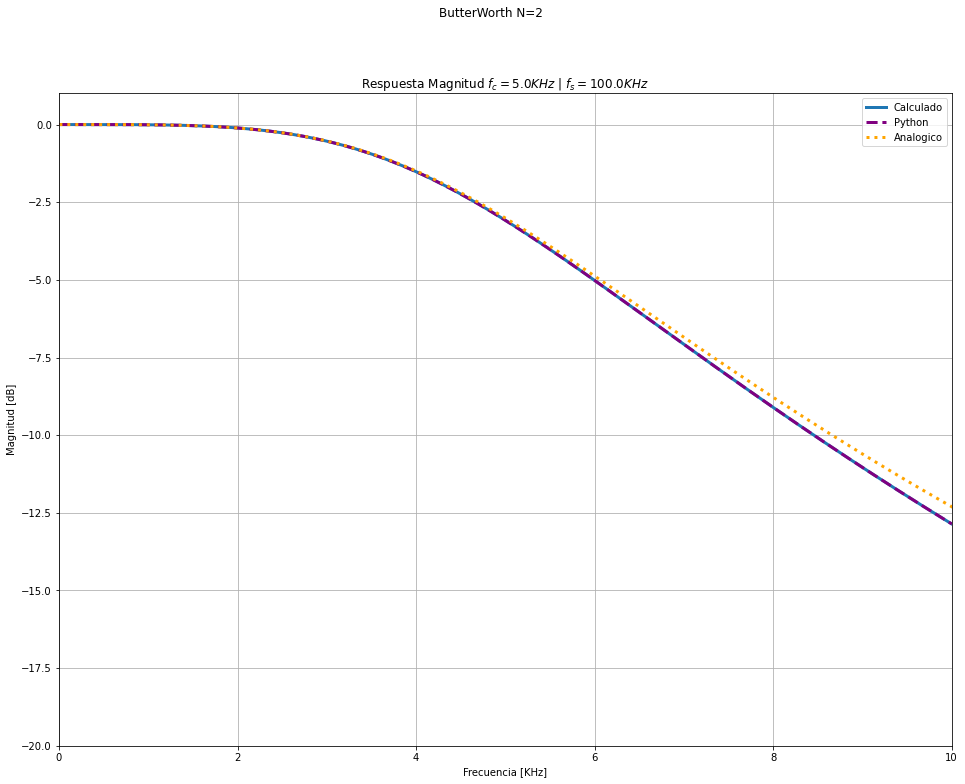

In [5]:
fc = 5e3
fs = 100e3
Graficos_TS8(fc, fs,0,10,-20,1)